In [1]:
import pandas as pd
import requests

In [2]:
# national robbery 2012-2022

national_url = 'https://api.usa.gov/crime/fbi/cde/nibrs/national/robbery?from=1-2012&type=Counts&to=12-2022&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

response = requests.get(national_url)
if response.status_code == 200:
    national = response.json()
else:
    print(f"Error: {response.status_code}")

In [17]:
national.get('victim').get('location')

{'Rest Area': 732,
 'Cyberspace': 0,
 'Restaurant': 57118,
 'Field/Woods': 8640,
 'Liquor Store': 8745,
 'Tribal Lands': 65,
 'Bar/Nightclub': 9578,
 'Farm Facility': 97,
 'Not Specified': 0,
 'Other/Unknown': 43827,
 'Shopping Mall': 6451,
 'Amusement Park': 290,
 'Residence/Home': 248894,
 'School/College': 1265,
 'Camp/Campground': 379,
 'Industrial Site': 341,
 'Park/Playground': 17848,
 'Specialty Store': 46181,
 'Community Center': 417,
 'Daycare Facility': 116,
 'Hotel/Motel/Etc.': 28167,
 'Construction Site': 1099,
 'Convenience Store': 116176,
 'Grocery/Supermarket': 37216,
 'Lake/Waterway/Beach': 695,
 'Service/Gas Station': 56014,
 'Bank/Savings and Loan': 33768,
 'Military Installation': 8,
 'ATM Separate from Bank': 1312,
 'Air/Bus/Train Terminal': 8508,
 'Parking/Drop Lot/Garage': 128665,
 'Rental Storage Facility': 855,
 'Auto Dealership New/Used': 924,
 'Shelter-Mission/Homeless': 521,
 'Department/Discount Store': 74394,
 'School-College/University': 1634,
 'Commercial

In [ ]:
# Maya - work on most robbed locations by state

# california robbery 2012-2022

cali_url = 'https://api.usa.gov/crime/fbi/cde/nibrs/state/CA/robbery?from=1-2012&to=12-2022&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

In [44]:
# Indi - work on robbery rate vs law enforcement employees by year

# employees 2012-2022

employees_url  = 'https://api.usa.gov/crime/fbi/cde/pe?from=2012&to=2022&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

response = requests.get(employees_url)
if response.status_code == 200:
    employees = response.json()
else:
    print(f"Error: {response.status_code}")

In [49]:
male = employees.get('actuals').get('Male Officers').values()
female = employees.get('actuals').get('Female Officers').values()

In [70]:
per = employees.get('rates').get('Officers per 1,000 People').values()

In [23]:
# national robbery 2012-2022 by year

base_url = 'https://api.usa.gov/crime/fbi/cde/nibrs/national/robbery?from={}&type=Counts&to={}&API_KEY=6pQ1XOFvDCRG0DpNsdgIhcyiCmfUafzMzPETHn3K'

rob_by_year = {}

for year in range(2012, 2023):
    url = base_url.format(f'1-{year}', f'12-{year}')
    response = requests.get(url)
    if response.status_code == 200:
        rob_by_year[year] = response.json()
    else:
        print(f"Error: {response.status_code}")


In [71]:
rob_per_year = []

for year in range(2012, 2023):
    rob_per_year.append(
        sum(rob_by_year.get(year).get('victim').get('sex').values()))

employees_df = pd.DataFrame([range(2012, 2023), rob_per_year, male, female, per]).T
employees_df.columns = ['Year', 'Robberies', 'Male_Officers', 'Female_Officers', 'Officers_per_1k']
employees_df.set_index('Year', inplace=True)
employees_df.to_csv('employees.csv')

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
employees_df = pd.read_csv('employees.csv')

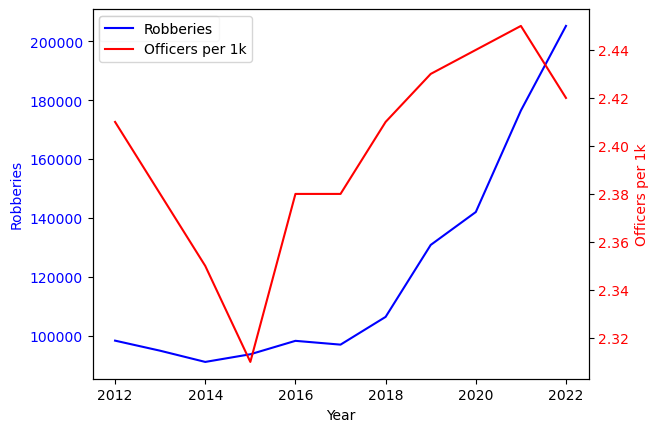

0.6648185233967915


In [87]:
fig, ax1 = plt.subplots()

# Plot the 'Robberies' on the left y-axis
sns.lineplot(data=employees_df, x='Year', y='Robberies',
             ax=ax1, label='Robberies', color='b')
ax1.set_ylabel('Robberies', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the 'Officers_per_1k' on the right y-axis
sns.lineplot(data=employees_df, x='Year', y='Officers_per_1k',
             ax=ax2, label='Officers per 1k', color='r')
ax2.set_ylabel('Officers per 1k', color='r')
ax2.tick_params(axis='y', labelcolor='r')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()
print(employees_df.Robberies.corr(employees_df.Officers_per_1k))